### Student Information
Name:呂佳勳

Student ID:109062570

GitHub ID:kant963963

---

### Instructions

1. First: do the **take home** exercises in the [DM2020-Lab1-Master Repo](https://github.com/fhcalderon87/DM2020-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2020-Lab1-Master Repo](https://github.com/fhcalderon87/DM2020-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fhcalderon87/DM2020-Lab1-Master/blob/master/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (Oct. 22th 11:59 pm, Thursday)__. 

In [1]:
### Begin Assignment Here

### First

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


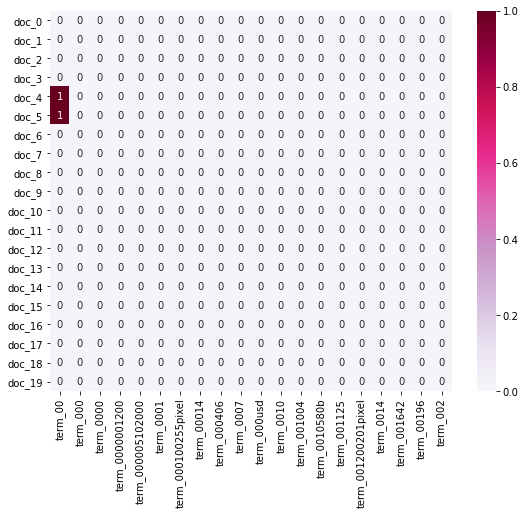

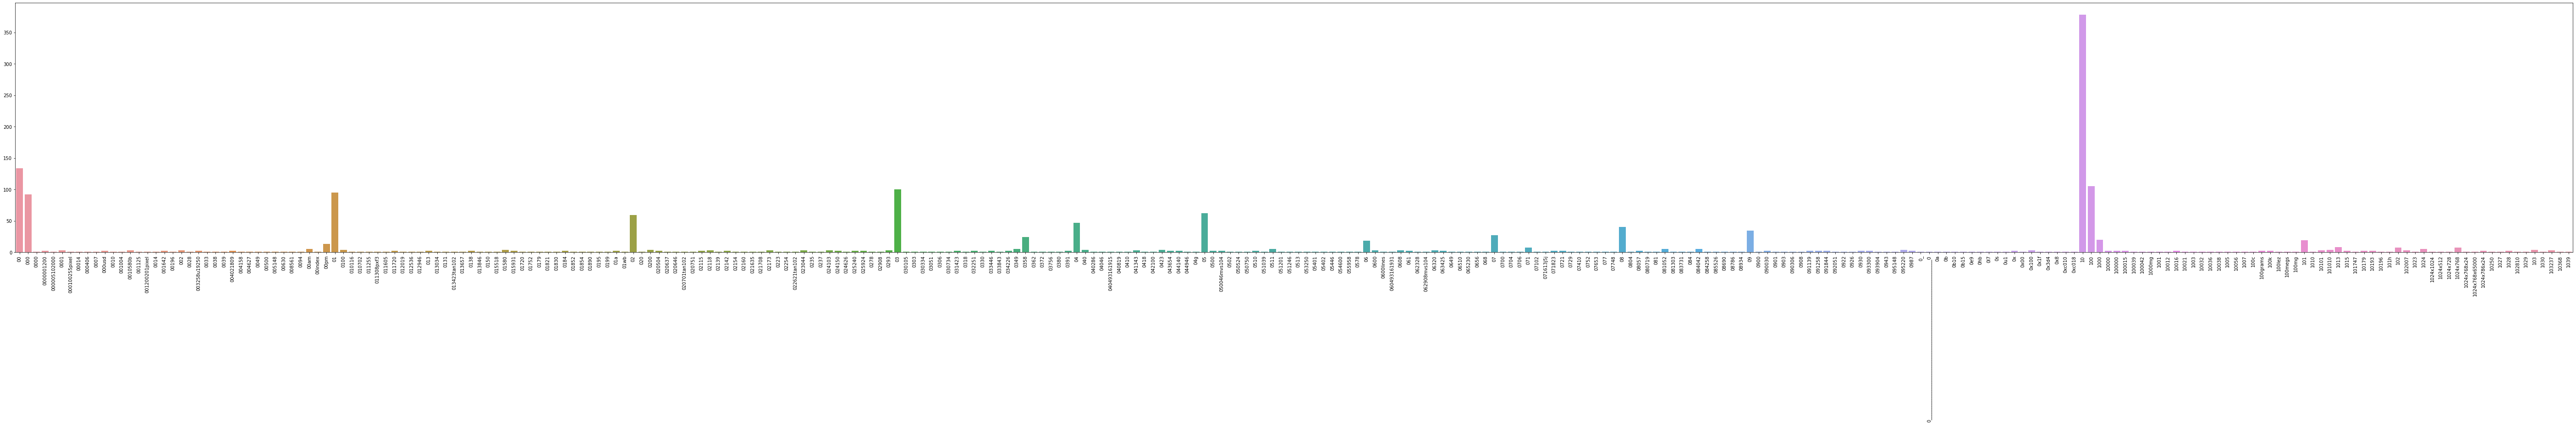

In [2]:
#init
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
from sklearn.datasets import fetch_20newsgroups

twenty_train = fetch_20newsgroups(subset='train', categories=categories, \
                                  shuffle=True, random_state=42)

import numpy as np
import pandas as pd

# my functions
import helpers.data_mining_helpers as dmh

# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])

# add category to the dataframe
X['category'] = twenty_train.target
# add category label also
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

X_sample = X.sample(n=1000) #random state
import matplotlib.pyplot as plt

import nltk
nltk.download('punkt')
# takes a like a minute or two to process
X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))

from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text)
analyze = count_vect.build_analyzer()

plot_x = ["term_"+str(i) for i in count_vect.get_feature_names()[0:20]]
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:20]]
plot_z = X_counts[0:20, 0:20].toarray()
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

from sklearn.decomposition import PCA
X_reduced = PCA(n_components = 2).fit_transform(X_counts.toarray())

# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90);

from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()
mlb.fit(X.category)
X['bin_category'] = mlb.transform(X['category']).tolist()

### ** >>> Exercise 2 (take home):** 
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. 

In [3]:
#Answer here
X.loc[lambda X: X['category_name']=='comp.graphics', :][:10]

,text,category,category_name,unigrams,bin_category
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics,"[From, :, sd345, @, city.ac.uk, (, Michael, Co...","[0, 1, 0, 0]"
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics,"[From, :, ani, @, ms.uky.edu, (, Aniruddha, B....","[0, 1, 0, 0]"
11,From: amjad@eng.umd.edu (Amjad A Soomro) Subje...,1,comp.graphics,"[From, :, amjad, @, eng.umd.edu, (, Amjad, A, ...","[0, 1, 0, 0]"
14,From: sloan@cis.uab.edu (Kenneth Sloan) Subjec...,1,comp.graphics,"[From, :, sloan, @, cis.uab.edu, (, Kenneth, S...","[0, 1, 0, 0]"
15,From: Mike_Peredo@mindlink.bc.ca (Mike Peredo)...,1,comp.graphics,"[From, :, Mike_Peredo, @, mindlink.bc.ca, (, M...","[0, 1, 0, 0]"
23,From: d91-hes@tekn.hj.se (STEFAN HERMANSSON) S...,1,comp.graphics,"[From, :, d91-hes, @, tekn.hj.se, (, STEFAN, H...","[0, 1, 0, 0]"
24,From: mjw19@cl.cam.ac.uk (M.J. Williams) Subje...,1,comp.graphics,"[From, :, mjw19, @, cl.cam.ac.uk, (, M.J., Wil...","[0, 1, 0, 0]"
25,From: dstampe@psych.toronto.edu (Dave Stampe) ...,1,comp.graphics,"[From, :, dstampe, @, psych.toronto.edu, (, Da...","[0, 1, 0, 0]"
39,From: g9134255@wampyr.cc.uow.edu.au (Coronado ...,1,comp.graphics,"[From, :, g9134255, @, wampyr.cc.uow.edu.au, (...","[0, 1, 0, 0]"
42,From: gwang@magnus.acs.ohio-state.edu (Ge Wang...,1,comp.graphics,"[From, :, gwang, @, magnus.acs.ohio-state.edu,...","[0, 1, 0, 0]"


### >>> **Exercise 5 (take home)** 
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?

In [4]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

,id,missing_example
0,A,NaN
1,B,NaN
2,C,NaN
3,D,None
4,E,None
5,F,


In [5]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

The missing_example of C is "NaN" which is a string not real NaN
The missing_example of D is "None" which is a string not real NaN
The missing_example of F is "" which is a string not real NaN


### >>> Exercise 6 (take home):
Notice any changes to the `X` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

X doesnt have any change
X.sample will return a new list and this method will not change the value of X

### >>> **Exercise 8 (take home):** 
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 

![alt txt](https://i.imgur.com/9eO431H.png)

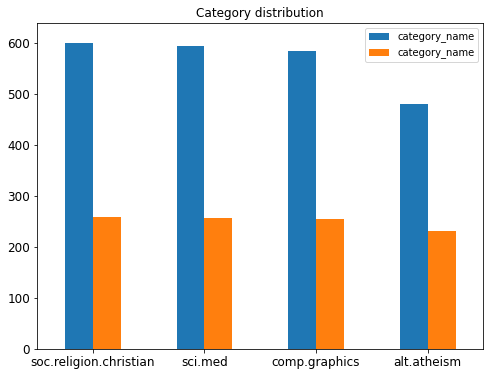

In [6]:
# Answer here
upper_bound = max(X.category_name.value_counts()) + 40

# plot barchart

a = pd.concat([X.category_name.value_counts(),X_sample.category_name.value_counts()],
              axis=1,join='outer').plot(kind = 'bar',
                                        title = 'Category distribution',
                                        ylim = [0, upper_bound], 
                                        rot = 0, fontsize = 12, figsize = (8,6))

### **>>> Exercise 10 (take home):**
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [7]:
# Answer here
count_vect.get_feature_names()[X_counts[4,0:100].nonzero()[1][1]]

'01'

### **>>> Exercise 11 (take home):** 
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

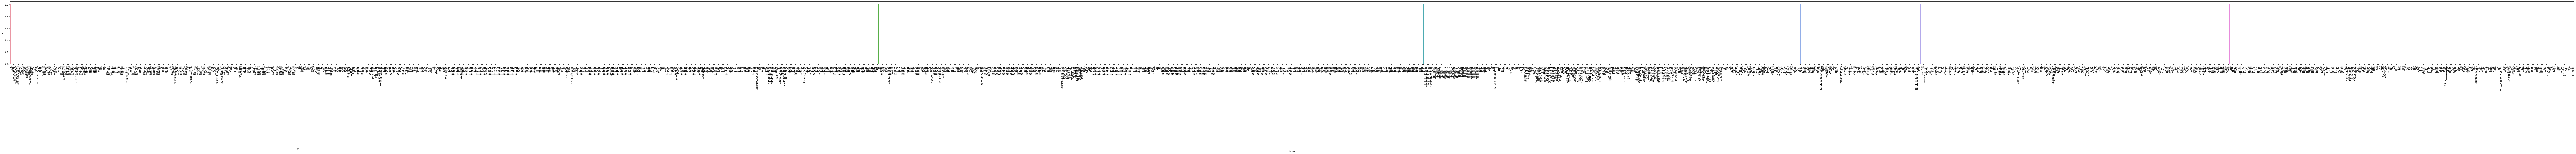

In [8]:
# Answer here
plot_x = [str(i) for i in count_vect.get_feature_names()[0:2000]]
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:20]]
plot_z = X_counts[0:2000,0:2000].toarray()
df_todraw = pd.DataFrame(plot_z).T
df_todraw['term'] = plot_x
plt.subplots(figsize=(200, 5))
sns.barplot(data=df_todraw, 
            x='term', 
            y=5).set_xticklabels(df_todraw['term'],rotation = 90);

### >>> Exercise 12 (take home):
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

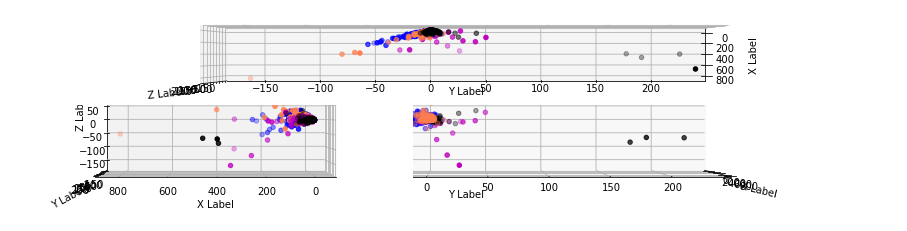

In [9]:
# Answer here
from mpl_toolkits.mplot3d import Axes3D

X_reduced = PCA(n_components = 3).fit_transform(X_counts.toarray())

col = ['coral', 'blue', 'black', 'm']
fig = plt.figure(figsize=plt.figaspect(0.25))
ax1 = fig.add_subplot(1,1,1,projection='3d')
ax2 = fig.add_subplot(1,2,1,projection='3d')
ax3 = fig.add_subplot(2,1,1,projection='3d')

for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
    zs = X_reduced[X['category_name'] == category].T[2]
   
    ax1.scatter(xs, ys, zs, c = c, marker='o')
    ax2.scatter(xs, ys, zs, c = c, marker='o')
    ax3.scatter(xs, ys, zs, c = c, marker='o')
    
ax1.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax1.set_xlabel('\nX Label')
ax1.set_ylabel('\nY Label')
ax1.set_zlabel('\nZ Label')
ax2.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax2.set_xlabel('\nX Label')
ax2.set_ylabel('\nY Label')
ax2.set_zlabel('\nZ Label')
ax3.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax3.set_xlabel('\nX Label')
ax3.set_ylabel('\nY Label')
ax3.set_zlabel('\nZ Label')

ax1.view_init(elev=0,azim=0)
ax2.view_init(elev=0,azim=90)
ax3.view_init(elev=90,azim=0)
plt.show()

### >>> **Exercise 13 (take home):**
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

In [10]:
# Answer here
import plotly as plty
import plotly.graph_objs as go

pyplt = plty.offline.plot
data = [go.Histogram(x=count_vect.get_feature_names()[:300],y=term_frequencies[:300])] 
pyplt(data,filename='temp-plot.html')

'temp-plot.html'

### >>> **Exercise 14 (take home):** 
The chart above contains all the vocabulary, and it's computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise. 


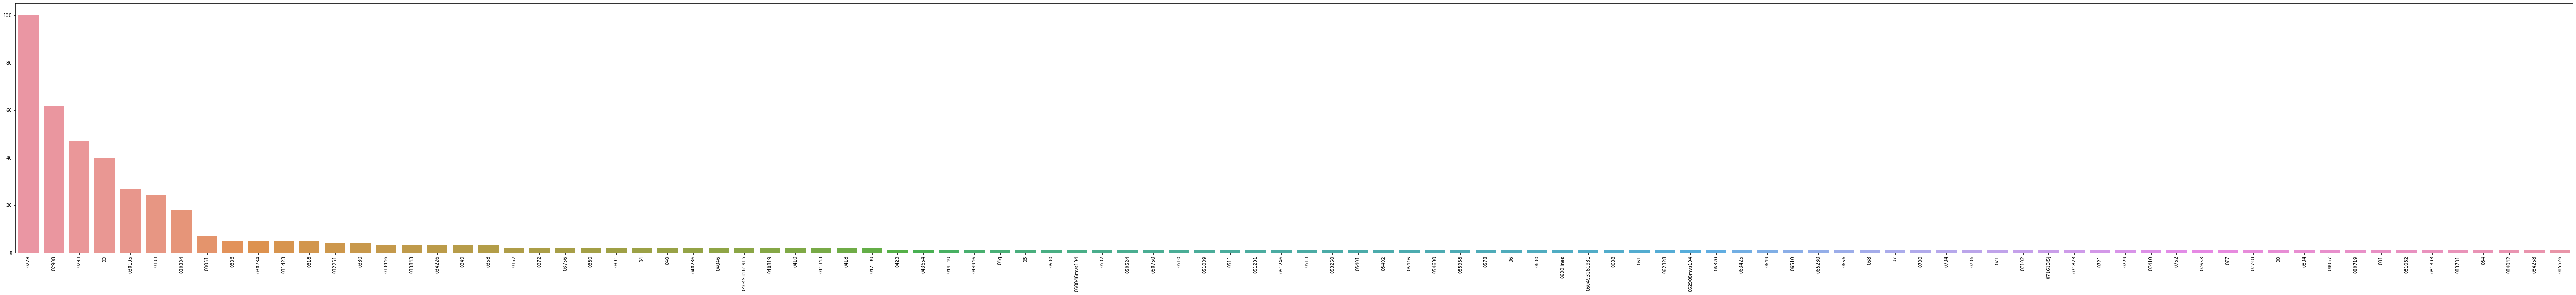

In [11]:
# Answer here
a = [[count_vect.get_feature_names()[i],term_frequencies[i]] for i in range(100,200)]
a = sorted(a, key=lambda x:x[1], reverse=True)
x = [a[i][0] for i in range(100)]
y = [a[i][1] for i in range(100)]
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=x, 
                y=y)
g.set_xticklabels(count_vect.get_feature_names()[100:200], rotation = 90);

### >>> **Exercise 15 (take home):** 
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

![alt txt](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Long_tail.svg/1000px-Long_tail.svg.png)

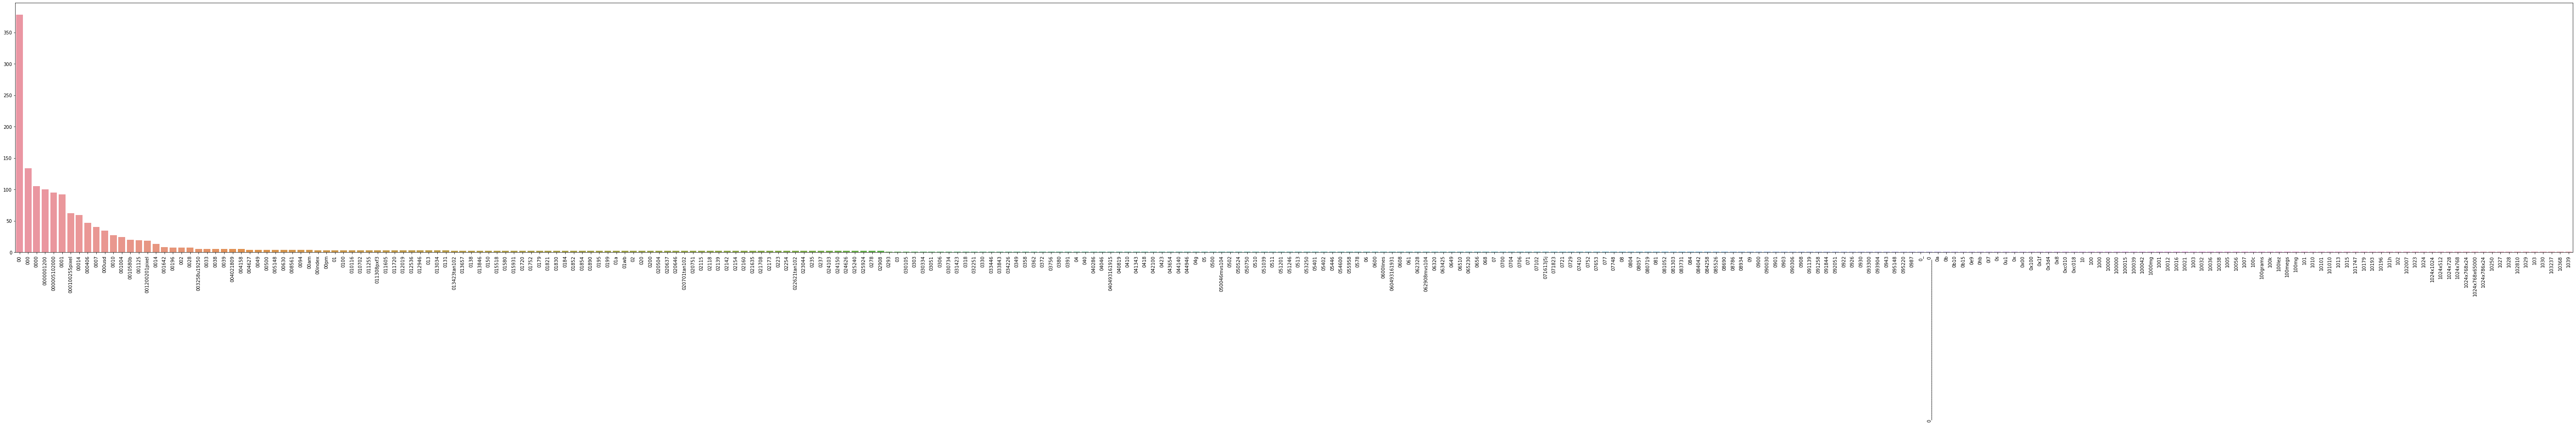

In [12]:
# Answer here
a = [[count_vect.get_feature_names()[i],term_frequencies[i]] for i in range(300)]
a = sorted(a, key=lambda x:x[1], reverse=True)
x = [a[i][0] for i in range(300)]
y = [a[i][1] for i in range(300)]
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=x, 
                y=y)
g.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90);

### >>> **Exercise 16 (take home):**
Try to generate the binarization using the `category_name` column instead. Does it work?

In [13]:
# Answer here
mlb.fit(X.category_name)
X['bin_category'] = mlb.transform(X['category_name']).tolist()
X[0:9]

,text,category,category_name,unigrams,bin_category
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics,"[From, :, sd345, @, city.ac.uk, (, Michael, Co...","[0, 1, 0, 0]"
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics,"[From, :, ani, @, ms.uky.edu, (, Aniruddha, B....","[0, 1, 0, 0]"
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian,"[From, :, djohnson, @, cs.ucsd.edu, (, Darin, ...","[0, 0, 0, 1]"
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian,"[From, :, s0612596, @, let.rug.nl, (, M.M, ., ...","[0, 0, 0, 1]"
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian,"[From, :, stanly, @, grok11.columbiasc.ncr.com...","[0, 0, 0, 1]"
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3,soc.religion.christian,"[From, :, vbv, @, lor.eeap.cwru.edu, (, Virgil...","[0, 0, 0, 1]"
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian,"[From, :, jodfishe, @, silver.ucs.indiana.edu,...","[0, 0, 0, 1]"
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med,"[From, :, aldridge, @, netcom.com, (, Jacqueli...","[0, 0, 1, 0]"
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med,"[From, :, geb, @, cs.pitt.edu, (, Gordon, Bank...","[0, 0, 1, 0]"


### Second

## 2. Data Preparation
Now let us begin to explore the data. The original dataset can be found on the link provided above or you can directly use the version provided by scikit learn. Here we will use the scikit learn version. 

In this demonstration we are only going to look at 4 categories. This means we will not make use of the complete dataset, but only a subset of it, which includes the 4 categories defined below:

## 3. Data Transformation
So we want to explore and understand our data a little bit better. Before we do that we definitely need to apply some transformations just so we can have our dataset in a nice format to be able to explore it freely and more efficient. Lucky for us, there are powerful scientific tools to transform our data into that tabular format we are so farmiliar with. So that is what we will do in the next section--transform our data into a nice table format.

In [14]:
import copy
categories = ['amazon_cells', 'imdb', 'yelp']

f = open("sentiment labelled sentences/amazon_cells_labelled.txt",encoding="utf-8")
a_lines = f.readlines()
f.close()
f = open('sentiment labelled sentences/imdb_labelled.txt',encoding="utf-8")
i_lines = f.readlines()
f.close()
f = open('sentiment labelled sentences/yelp_labelled.txt',encoding="utf-8")
y_lines = f.readlines()
f.close()

In [15]:
a = [[a_lines[i][:-3],0,'amazon_cells',a_lines[i][-2]] for i in range(len(a_lines))]
a += [[i_lines[i][:-3],1,'imdb',i_lines[i][-2]] for i in range(len(i_lines))]
a += [[y_lines[i][:-3],2,'yelp',y_lines[i][-2]] for i in range(len(y_lines))]
datasets = pd.DataFrame(a, columns=['sentence','category','category_name','score'])
datasets

,sentence,category,category_name,score
0,So there is no way for me to plug it in here i...,0,amazon_cells,0
1,"Good case, Excellent value.",0,amazon_cells,1
2,Great for the jawbone.,0,amazon_cells,1
3,Tied to charger for conversations lasting more...,0,amazon_cells,0
4,The mic is great.,0,amazon_cells,1
...,...,...,...,...
2995,I think food should have flavor and texture an...,2,yelp,0
2996,Appetite instantly gone.,2,yelp,0
2997,Overall I was not impressed and would not go b...,2,yelp,0
2998,"The whole experience was underwhelming, and I ...",2,yelp,0


In [16]:
#Exercise1
for t in datasets['sentence'][:3]:
    print(t)

So there is no way for me to plug it in here in the US unless I go by a converter.
Good case, Excellent value.
Great for the jawbone.


In [17]:
#Exercise2
datasets.loc[lambda X:X['category_name']=='imdb', :][:10]

,sentence,category,category_name,score
1000,"A very, very, very slow-moving, aimless movie ...",1,imdb,0
1001,Not sure who was more lost - the flat characte...,1,imdb,0
1002,Attempting artiness with black & white and cle...,1,imdb,0
1003,Very little music or anything to speak of.,1,imdb,0
1004,The best scene in the movie was when Gerardo i...,1,imdb,1
1005,"The rest of the movie lacks art, charm, meanin...",1,imdb,0
1006,Wasted two hours.,1,imdb,0
1007,Saw the movie today and thought it was a good ...,1,imdb,1
1008,A bit predictable.,1,imdb,0
1009,Loved the casting of Jimmy Buffet as the scien...,1,imdb,1


In [18]:
# Exercise3
datasets.loc[lambda f:f.category_name == 'yelp'].iloc[::10][:5]

,sentence,category,category_name,score
2000,Wow... Loved this place.,2,yelp,1
2010,Service was very prompt.,2,yelp,1
2020,The Burrittos Blah!,2,yelp,0
2030,"Also there are combos like a burger, fries, an...",2,yelp,1
2040,The shrimp tender and moist.,2,yelp,1


## 4. Data Mining using Pandas

Let's do some serious work now. Let's learn to program some of the ideas and concepts learned so far in the data mining course. This is the only way we can be convince ourselves of the true power of Pandas dataframes. 

### 4.1 Missing Values

First, let us consider that our dataset has some *missing values* and we want to remove those values. In its current state our dataset has no missing values, but for practice sake we will add some records with missing values and then write some code to deal with these objects that contain missing values. You will see for yourself how easy it is to deal with missing values once you have your data transformed into a Pandas dataframe.

Before we jump into coding, let us do a quick review of what we have learned in the Data Mining course. Specifically, let's review the methods used to deal with missing values.

The most common reasons for having missing values in datasets has to do with how the data was initially collected. A good example of this is when a patient comes into the ER room, the data is collected as quickly as possible and depending on the conditions of the patients, the personal data being collected is either incomplete or partially complete. In the former and latter cases, we are presented with a case of "missing values". Knowing that patients data is particularly critical and can be used by the health authorities to conduct some interesting analysis, we as the data miners are left with the tough task of deciding what to do with these missing and incomplete records. We need to deal with these records because they are definitely going to affect our analysis or learning algorithms. So what do we do? There are several ways to handle missing values, and some of the more effective ways are presented below (Note: You can reference the slides - Session 1 Handout for the additional information).

- **Eliminate Data Objects** - Here we completely discard records once they contain some missing values. This is the easiest approach and the one we will be using in this notebook. The immediate drawback of going with this approach is that you lose some information, and in some cases too much of it. Now imagine that half of the records have at least one or more missing values. Here you are presented with the tough decision of quantity vs quality. In any event, this decision must be made carefully, hence the reason for emphasizing it here in this notebook. 

- **Estimate Missing Values** - Here we try to estimate the missing values based on some criteria. Although this approach may be proven to be effective, it is not always the case, especially when we are dealing with sensitive data, like **Gender** or **Names**. For fields like **Address**, there could be ways to obtain these missing addresses using some data aggregation technique or obtain the information directly from other databases or public data sources.

- **Ignore the missing value during analysis** - Here we basically ignore the missing values and proceed with our analysis. Although this is the most naive way to handle missing values it may proof effective, especially when the missing values includes information that is not important to the analysis being conducted. But think about it for a while. Would you ignore missing values, especially when in this day and age it is difficult to obtain high quality datasets? Again, there are some tradeoffs, which we will talk about later in the notebook.

- **Replace with all possible values** - As an efficient and responsible data miner, we sometimes just need to put in the hard hours of work and find ways to makes up for these missing values. This last option is a very wise option for cases where data is scarce (which is almost always) or when dealing with sensitive data. Imagine that our dataset has an **Age** field, which contains many missing values. Since **Age** is a continuous variable, it means that we can build a separate model for calculating the age for the incomplete records based on some rule-based appraoch or probabilistic approach.  

As mentioned earlier, we are going to go with the first option but you may be asked to compute missing values, using a different approach, as an exercise. Let's get to it!

First we want to add the dummy records with missing values since the dataset we have is perfectly composed and cleaned that it contains no missing values. First let us check for ourselves that indeed the dataset doesn't contain any missing values. We can do that easily by using the following built-in function provided by Pandas.  

In [19]:
print(datasets.isnull())
datasets.isnull().apply(lambda x: dmh.check_missing_values(x))


      sentence  category  category_name  score
0        False     False          False  False
1        False     False          False  False
2        False     False          False  False
3        False     False          False  False
4        False     False          False  False
...        ...       ...            ...    ...
2995     False     False          False  False
2996     False     False          False  False
2997     False     False          False  False
2998     False     False          False  False
2999     False     False          False  False

[3000 rows x 4 columns]


sentence         (The amoung of missing records is: , 0)
category         (The amoung of missing records is: , 0)
category_name    (The amoung of missing records is: , 0)
score            (The amoung of missing records is: , 0)
dtype: object

In [20]:
# Exercise4
datasets.isnull().apply(lambda x: dmh.check_missing_values(x), axis=1)

0       (The amoung of missing records is: , 0)
1       (The amoung of missing records is: , 0)
2       (The amoung of missing records is: , 0)
3       (The amoung of missing records is: , 0)
4       (The amoung of missing records is: , 0)
                         ...                   
2995    (The amoung of missing records is: , 0)
2996    (The amoung of missing records is: , 0)
2997    (The amoung of missing records is: , 0)
2998    (The amoung of missing records is: , 0)
2999    (The amoung of missing records is: , 0)
Length: 3000, dtype: object

In [21]:
# Missing Values
dummy_series = pd.Series(["dummy_record", 1, 1], index=["sentence", "category", "score"])
result_with_series = datasets.append(dummy_series, ignore_index=True)
print(len(result_with_series))
result_with_series.isnull().apply(lambda x: dmh.check_missing_values(x))

3001


sentence         (The amoung of missing records is: , 0)
category         (The amoung of missing records is: , 0)
category_name    (The amoung of missing records is: , 1)
score            (The amoung of missing records is: , 0)
dtype: object

In [22]:
# dummy record as dictionary format
dummy_dict = [{'sentence': 'dummy_record',
               'category': 1,
               'score': 1
              }]
datasets = datasets.append(dummy_dict, ignore_index=True)
print(len(datasets))
print(datasets.isnull().apply(lambda x: dmh.check_missing_values(x)))
datasets.dropna(inplace=True)
print(datasets.isnull().apply(lambda x: dmh.check_missing_values(x)))
len(datasets)

3001
sentence         (The amoung of missing records is: , 0)
category         (The amoung of missing records is: , 0)
category_name    (The amoung of missing records is: , 1)
score            (The amoung of missing records is: , 0)
dtype: object
sentence         (The amoung of missing records is: , 0)
category         (The amoung of missing records is: , 0)
category_name    (The amoung of missing records is: , 0)
score            (The amoung of missing records is: , 0)
dtype: object


3000

### 4.2 Dealing with Duplicate Data
Dealing with duplicate data is just as painful as dealing with missing data. The worst case is that you have duplicate data that has missing values. But let us not get carried away. Let us stick with the basics. As we have learned in our Data Mining course, duplicate data can occur because of many reasons. The majority of the times it has to do with how we store data or how we collect and merge data. For instance, we may have collected and stored a tweet, and a retweet of that same tweet as two different records; this results in a case of data duplication; the only difference being that one is the original tweet and the other the retweeted one. Here you will learn that dealing with duplicate data is not as challenging as missing values. But this also all depends on what you consider as duplicate data, i.e., this all depends on your criteria for what is considered as a duplicate record and also what type of data you are dealing with. For textual data, it may not be so trivial as it is for numerical values or images. Anyhow, let us look at some code on how to deal with duplicate records in our `X` dataframe.

First, let us check how many duplicates we have in our current dataset. Here is the line of code that checks for duplicates; it is very similar to the `isnull` function that we used to check for missing values. 

In [23]:
#  Dealing with Duplicate Data
print(datasets.duplicated())
print(sum(datasets.duplicated()))
print(sum(datasets.duplicated('sentence')))

result_datasets = copy.deepcopy(datasets)
result_datasets.drop_duplicates(keep=False, inplace=True) # inplace applies changes directly on our dataframe
print(len(result_datasets))

0       False
1       False
2       False
3       False
4       False
        ...  
2995    False
2996    False
2997    False
2998    False
2999    False
Length: 3000, dtype: bool
17
17
2966


In [24]:
#sampling
datasets_sample = datasets.sample(n=1000) #random state
print(len(datasets_sample))
print(datasets_sample[0:4])

1000
                                               sentence  category  \
1336  The characters were very 'stagey' and the stor...         1   
2666                      The staff was very attentive.         2   
2520  Oh this is such a thing of beauty, this restau...         2   
416                 An Awesome New Look For Fall 2000!.         0   

     category_name score  
1336          imdb     0  
2666          yelp     1  
2520          yelp     1  
416   amazon_cells     1  


amazon_cells    1000
yelp            1000
imdb            1000
Name: category_name, dtype: int64


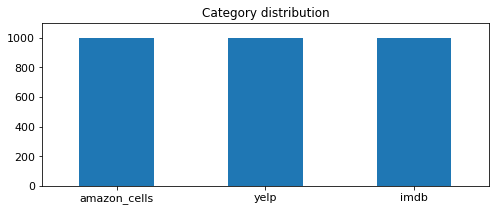

In [25]:
#matplotlib
print(datasets.category_name.value_counts())

# plot barchart for datasets_sample
datasets.category_name.value_counts().plot(kind = 'bar',
                                           title = 'Category distribution',
                                           ylim = [0, 1100],        
                                           rot = 0, fontsize = 11, figsize = (8,3))

## 5.  Data Preprocessing
In the Data Mining course we learned about the many ways of performing data preprocessing. In reality, the list is quiet general as the specifics of what data preprocessing involves is too much to cover in one course. This is especially true when you are dealing with unstructured data, as we are dealing with in this particular notebook. But let us look at some examples for each data preprocessing technique that we learned in the class. We will cover each item one by one, and provide example code for each category. You will learn how to peform each of the operations, using Pandas, that cover the essentials to Preprocessing in Data Mining. We are not going to follow any strict order, but the items we will cover in the preprocessing section of this notebook are as follows:

- Aggregation
- Sampling
- Dimensionality Reduction
- Feature Subset Selection
- Feature Creation
- Discretization and Binarization
- Attribute Transformation

---

### 5.1 Sampling
The first concept that we are going to cover from the above list is sampling. Sampling refers to the technique used for selecting data. The functionalities that we use to  selected data through queries provided by Pandas are actually basic methods for sampling. The reasons for sampling are sometimes due to the size of data -- we want a smaller subset of the data that is still representatitive enough as compared to the original dataset. 

We don't have a problem of size in our current dataset since it is just a couple thousand records long. But if we pay attention to how much content is included in the `text` field of each of those records, you will realize that sampling may not be a bad idea after all. In fact, we have already done some sampling by just reducing the records we are using here in this notebook; remember that we are only using four categories from the all the 20 categories available. Let us get an idea on how to sample using pandas operations.

imdb            359
amazon_cells    339
yelp            302
Name: category_name, dtype: int64


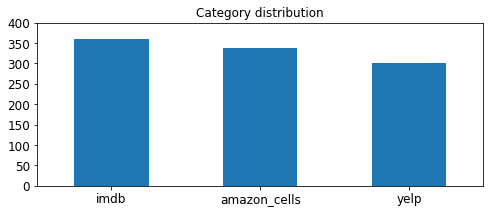

In [26]:
print(datasets_sample.category_name.value_counts())

# plot barchart for X_sample
datasets_sample.category_name.value_counts().plot(kind = 'bar',
                                                  title = 'Category distribution',
                                                  ylim = [0, 400], 
                                                  rot = 0, fontsize = 12, figsize = (8,3))

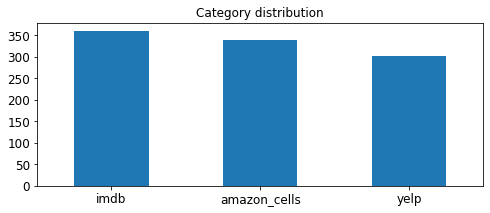

In [27]:
# Exercise7
upper_bound = max(datasets_sample.category_name.value_counts()) + 20

# plot barchart for X_sample
datasets_sample.category_name.value_counts().plot(kind = 'bar',
                                                  title = 'Category distribution',
                                                  ylim = [0, upper_bound], 
                                                  rot = 0, fontsize = 12, figsize = (8,3))

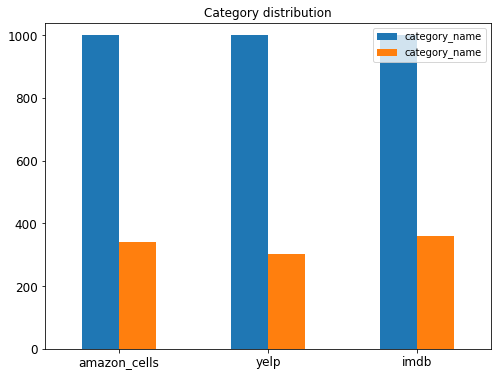

In [28]:
#Exercise8
upper_bound = max(datasets.category_name.value_counts()) + 40

# plot barchart

a = pd.concat([datasets.category_name.value_counts(),datasets_sample.category_name.value_counts()],
              axis=1,join='outer').plot(kind = 'bar',
                                        title = 'Category distribution',
                                        ylim = [0, upper_bound], 
                                        rot = 0, fontsize = 12, figsize = (8,6))

### 5.2 Feature Creation
The other operation from the list above that we are going to practise on is the so-called feature creation. As the name suggests, in feature creation we are looking at creating new interesting and useful features from the original dataset; a feature which captures the most important information from the raw information we already have access to. In our `X` table, we would like to create some features from the `text` field, but we are still not sure what kind of features we want to create. We can think of an interesting problem we want to solve, or something we want to analyze from the data, or some questions we want to answer. This is one process to come up with features -- this process is usually called `feature engineering` in the data science community. 

We know what feature creation is so let us get real involved with our dataset and make it more interesting by adding some special features or attributes if you will. First, we are going to obtain the **unigrams** for each text. (Unigram is just a fancy word we use in Text Mining which stands for 'tokens' or 'individual words'.) Yes, we want to extract all the words found in each text and append it as a new feature to the pandas dataframe. The reason for extracting unigrams is not so clear yet, but we can start to think of obtaining some statistics about the articles we have: something like **word distribution** or **word frequency**.

Before going into any further coding, we will also introduce a useful text mining library called [NLTK](http://www.nltk.org/). The NLTK library is a natural language processing tool used for text mining tasks, so might as well we start to familiarize ourselves with it from now (It may come in handy for the final project!). In partcular, we are going to use the NLTK library to conduct tokenization because we are interested in splitting a sentence into its individual components, which we refer to as words, emojis, emails, etc. So let us go for it! We can call the `nltk` library as follows:

```python
import nltk
```

In [29]:
# Feature Creation

# takes a like a minute or two to process
datasets['unigrams'] = datasets['sentence'].apply(lambda x: dmh.tokenize_text(x))
print(datasets[0:4]["unigrams"])
print(datasets[0:4])
print(list(datasets[0:1]['unigrams']))

0    [So, there, is, no, way, for, me, to, plug, it...
1                 [Good, case, ,, Excellent, value, .]
2                        [Great, for, the, jawbone, .]
3    [Tied, to, charger, for, conversations, lastin...
Name: unigrams, dtype: object
                                            sentence  category category_name  \
0  So there is no way for me to plug it in here i...         0  amazon_cells   
1                        Good case, Excellent value.         0  amazon_cells   
2                             Great for the jawbone.         0  amazon_cells   
3  Tied to charger for conversations lasting more...         0  amazon_cells   

  score                                           unigrams  
0     0  [So, there, is, no, way, for, me, to, plug, it...  
1     1               [Good, case, ,, Excellent, value, .]  
2     1                      [Great, for, the, jawbone, .]  
3     0  [Tied, to, charger, for, conversations, lastin...  
[['So', 'there', 'is', 'no', 'way', 'for', '

### 5.3 Feature subset selection
Okay, so we are making some headway here. Let us now make things a bit more interesting. We are going to do something different from what we have been doing thus far. We are going use a bit of everything that we have learned so far. Briefly speaking, we are going to move away from our main dataset (one form of feature subset selection), and we are going to generate a document-term matrix from the original dataset. In other words we are going to be creating something like this. 

![alt txt](https://docs.google.com/drawings/d/e/2PACX-1vS01RrtPHS3r1Lf8UjX4POgDol-lVF4JAbjXM3SAOU-dOe-MqUdaEMWwJEPk9TtiUvcoSqTeE--lNep/pub?w=748&h=366)

Initially, it won't have the same shape as the table above, but we will get into that later. For now, let us use scikit learn built in functionalities to generate this document. You will see for yourself how easy it is to generate this table without much coding. 

In [30]:
# Feature subset selection
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
datasets_counts = count_vect.fit_transform(datasets.sentence)
analyze = count_vect.build_analyzer()

In [31]:
# Exercise9
analyze(" ".join(list(datasets[:1].sentence)))

['so',
 'there',
 'is',
 'no',
 'way',
 'for',
 'me',
 'to',
 'plug',
 'it',
 'in',
 'here',
 'in',
 'the',
 'us',
 'unless',
 'go',
 'by',
 'converter']

In [32]:
print(datasets_counts.shape)
print(count_vect.get_feature_names()[0:10])
print(datasets_counts[0:5, 0:100].toarray())

(3000, 5155)
['00', '10', '100', '11', '12', '13', '15', '15g', '15pm', '17']
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 

In [33]:
# Exercise10
#find the meaning of 1 in third record
count_vect.get_feature_names()[datasets_counts[3:4,0:100].nonzero()[1][0]]

'45'

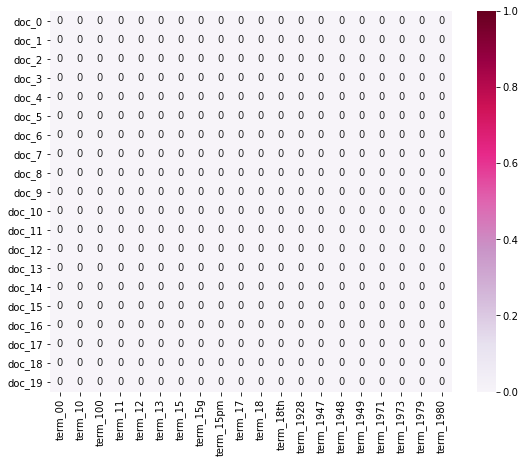

In [34]:
#seaborn
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names()[0:20]]
plot_y = ["doc_"+ str(i) for i in list(datasets.index)[0:20]]
plot_z = datasets_counts[0:20, 0:20].toarray()

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

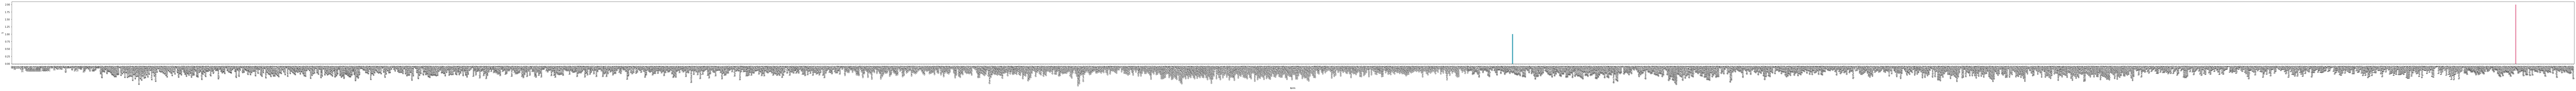

In [35]:
# Exercise11
plot_x = [str(i) for i in count_vect.get_feature_names()[0:2000]]
plot_y = ["doc_"+ str(i) for i in list(datasets.index)[0:20]]
plot_z = datasets_counts[0:2000,0:2000].toarray()
df_todraw = pd.DataFrame(plot_z).T
df_todraw['term'] = plot_x
plt.subplots(figsize=(200, 5))
sns.barplot(data=df_todraw, 
            x='term', 
            y=5).set_xticklabels(df_todraw['term'],rotation = 90);

### 5.4 Dimensionality Reduction
Since we have just touched on the concept of sparsity most naturally the problem of "curse of dimentionality" comes up. I am not going to get into the full details of what dimensionality reduction is and what it is good for just the fact that is an excellent technique for visualizing data efficiently (please refer to notes for more information). All I can say is that we are going to deal with the issue of sparsity with a few lines of code. And we are going to try to visualize our data more efficiently with the results.

We are going to make use of Principal Component Analysis to efficeintly reduce the dimensions of our data, with the main goal of "finding a projection that captures the largest amount of variation in the data." This concept is important as it is very useful for visualizing and observing the characteristics of our dataset. 

[PCA Algorithm](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)

**Input:** Raw term-vector matrix

**Output:** Projections 

(3000, 2)


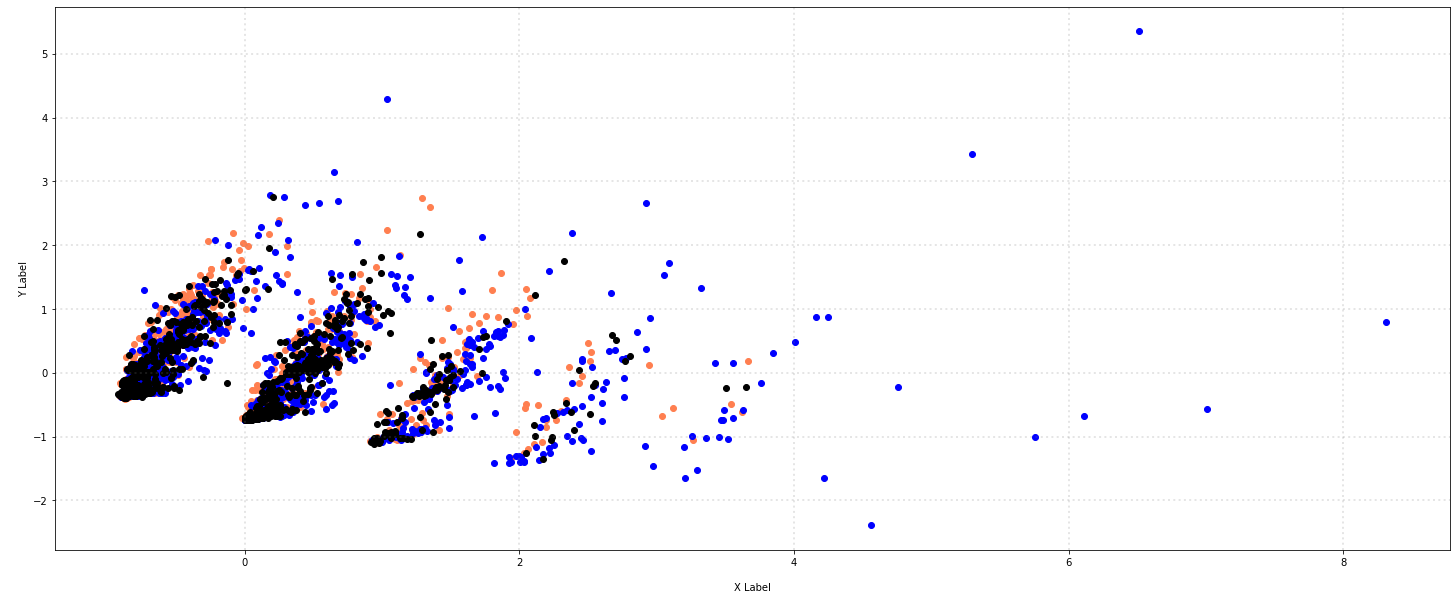

In [36]:
#dimension reduction
from sklearn.decomposition import PCA

datasets_reduced = PCA(n_components = 2).fit_transform(datasets_counts.toarray())
print(datasets_reduced.shape)

col = ['coral', 'blue', 'black', 'm']

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, category in zip(col, categories):
    xs = datasets_reduced[datasets['category_name'] == category].T[0]
    ys = datasets_reduced[datasets['category_name'] == category].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

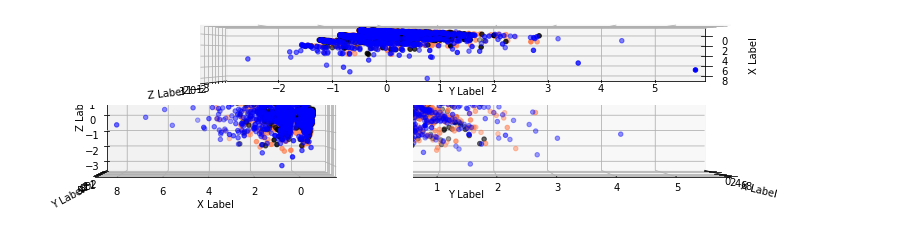

In [37]:
#Exercise 12 (take home):¶
#Please try to reduce the dimension to 3, and plot the result use 3-D plot. 
#Use at least 3 different angle (camera position) to check your result and describe what you found.
from mpl_toolkits.mplot3d import Axes3D

datasets_reduced = PCA(n_components = 3).fit_transform(datasets_counts.toarray())

col = ['coral', 'blue', 'black', 'm']
fig = plt.figure(figsize=plt.figaspect(0.25))
ax1 = fig.add_subplot(1,1,1,projection='3d')
ax2 = fig.add_subplot(1,2,1,projection='3d')
ax3 = fig.add_subplot(2,1,1,projection='3d')

for c, category in zip(col, categories):
    xs = datasets_reduced[datasets['category_name'] == category].T[0]
    ys = datasets_reduced[datasets['category_name'] == category].T[1]
    zs = datasets_reduced[datasets['category_name'] == category].T[2]
   
    ax1.scatter(xs, ys, zs, c = c, marker='o')
    ax2.scatter(xs, ys, zs, c = c, marker='o')
    ax3.scatter(xs, ys, zs, c = c, marker='o')
    
ax1.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax1.set_xlabel('\nX Label')
ax1.set_ylabel('\nY Label')
ax1.set_zlabel('\nZ Label')
ax2.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax2.set_xlabel('\nX Label')
ax2.set_ylabel('\nY Label')
ax2.set_zlabel('\nZ Label')
ax3.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax3.set_xlabel('\nX Label')
ax3.set_ylabel('\nY Label')
ax3.set_zlabel('\nZ Label')

ax1.view_init(elev=0,azim=0)
ax2.view_init(elev=0,azim=90)
ax3.view_init(elev=90,azim=0)
plt.show()

### 5.5 Atrribute Transformation / Aggregation
We can do other things with the term-vector matrix besides applying dimensionalaity reduction technique to deal with sparsity problem. Here we are going to generate a simple distribution of the words found in all the entire set of articles. Intuitively, this may not make any sense, but in data science sometimes we take some things for granted, and we just have to explore the data first before making any premature conclusions. On the topic of attribute transformation, we will take the word distribution and put the distribution in a scale that makes it easy to analyze patterns in the distrubution of words. Let us get into it!

First, we need to compute these frequencies for each term in all documents. Visually speaking, we are seeking to add values of the 2D matrix, vertically; i.e., sum of each column. You can also refer to this process as aggregation, which we won't explore further in this notebook because of the type of data we are dealing with. But I believe you get the idea of what that includes.  

![alt txt](https://docs.google.com/drawings/d/e/2PACX-1vTMfs0zWsbeAl-wrpvyCcZqeEUf7ggoGkDubrxX5XtwC5iysHFukD6c-dtyybuHnYigiRWRlRk2S7gp/pub?w=750&h=412)

1


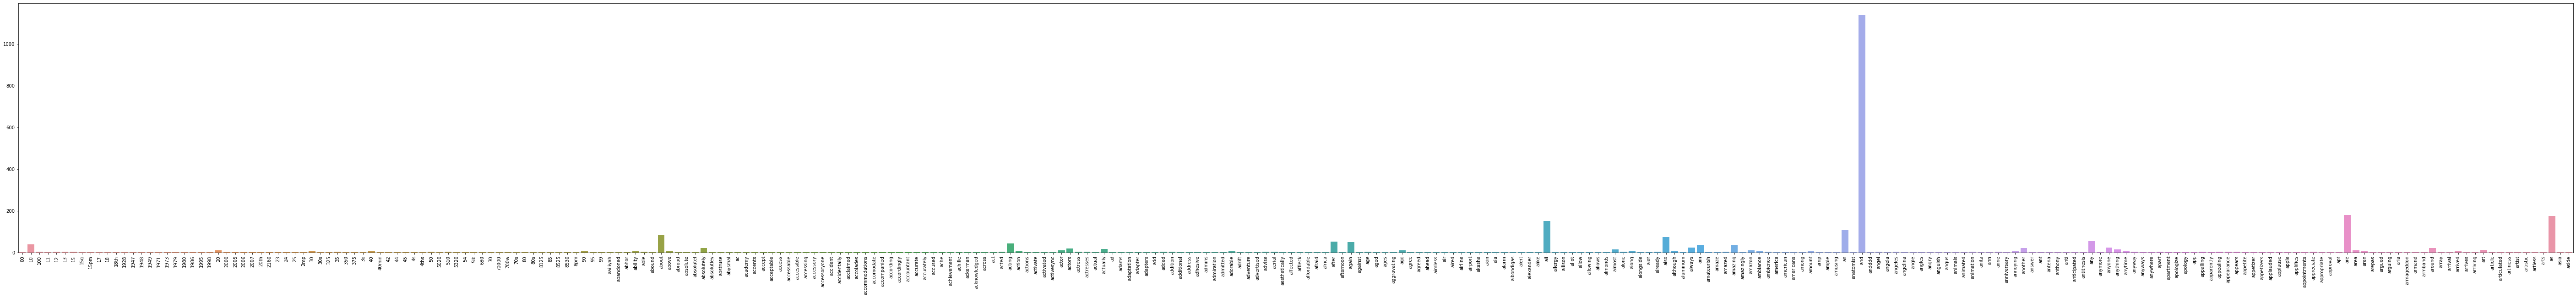

In [38]:
#Atrribute Transformation / Aggregation
term_frequencies = []
for j in range(0,datasets_counts.shape[1]):
    term_frequencies.append(sum(datasets_counts[:,j].toarray()))
term_frequencies = np.asarray(datasets_counts.sum(axis=0))[0]
print(term_frequencies[0])

plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names()[:300], 
                y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90);

In [39]:
#Exercise 13
#If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.
import plotly as plty
import plotly.graph_objs as go

pyplt = plty.offline.plot
data = [go.Histogram(x=count_vect.get_feature_names()[:300],y=term_frequencies[:300])] 
pyplt(data,filename='temp-plot.html')

'temp-plot.html'

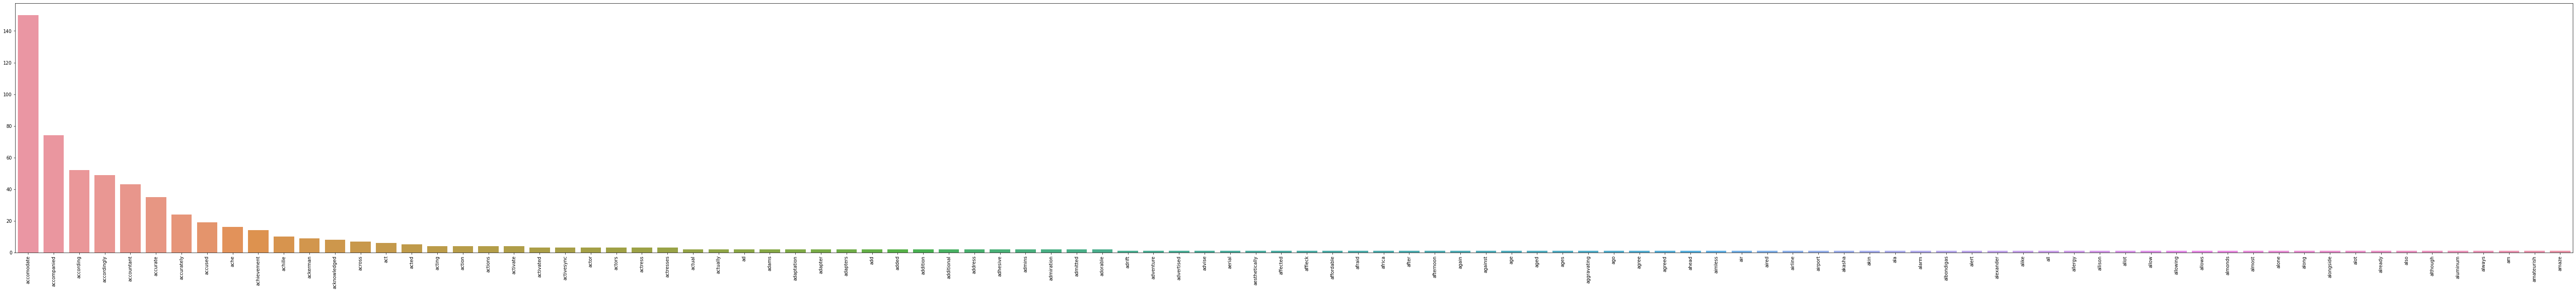

In [40]:
#Exercise 14
a = [[count_vect.get_feature_names()[i],term_frequencies[i]] for i in range(100,200)]
a = sorted(a, key=lambda x:x[1], reverse=True)
x = [a[i][0] for i in range(100)]
y = [a[i][1] for i in range(100)]
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=x, 
                y=y)
g.set_xticklabels(count_vect.get_feature_names()[100:200], rotation = 90);

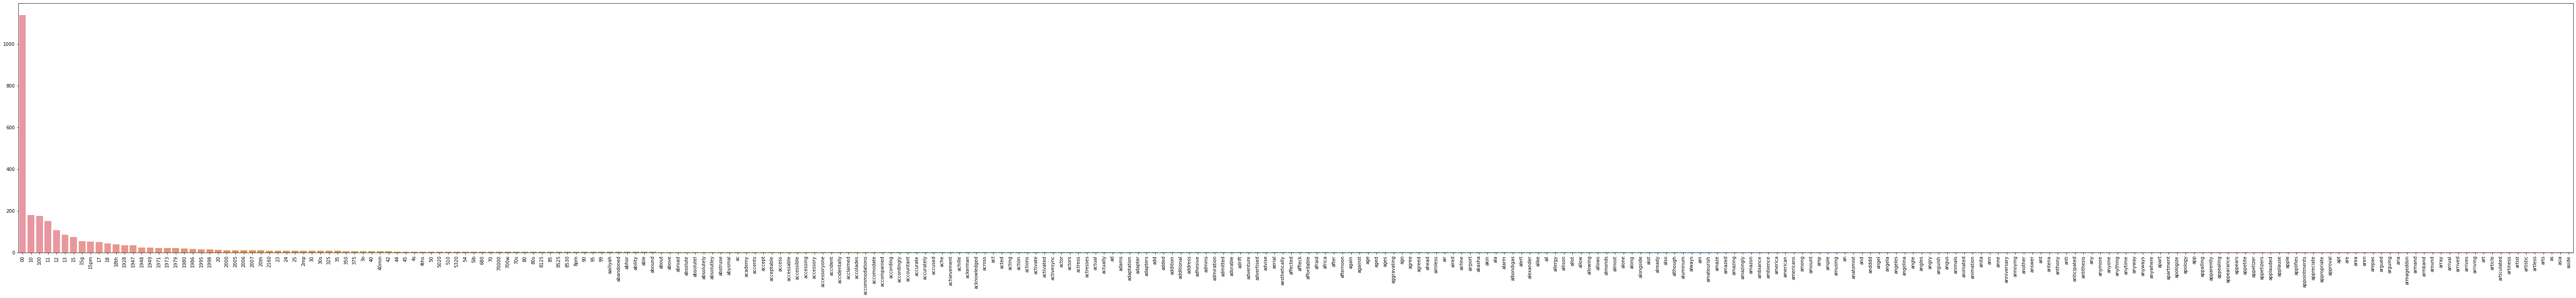

In [41]:
#Exercise 15
a = [[count_vect.get_feature_names()[i],term_frequencies[i]] for i in range(300)]
a = sorted(a, key=lambda x:x[1], reverse=True)
x = [a[i][0] for i in range(300)]
y = [a[i][1] for i in range(300)]
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=x, 
                y=y)
g.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90);

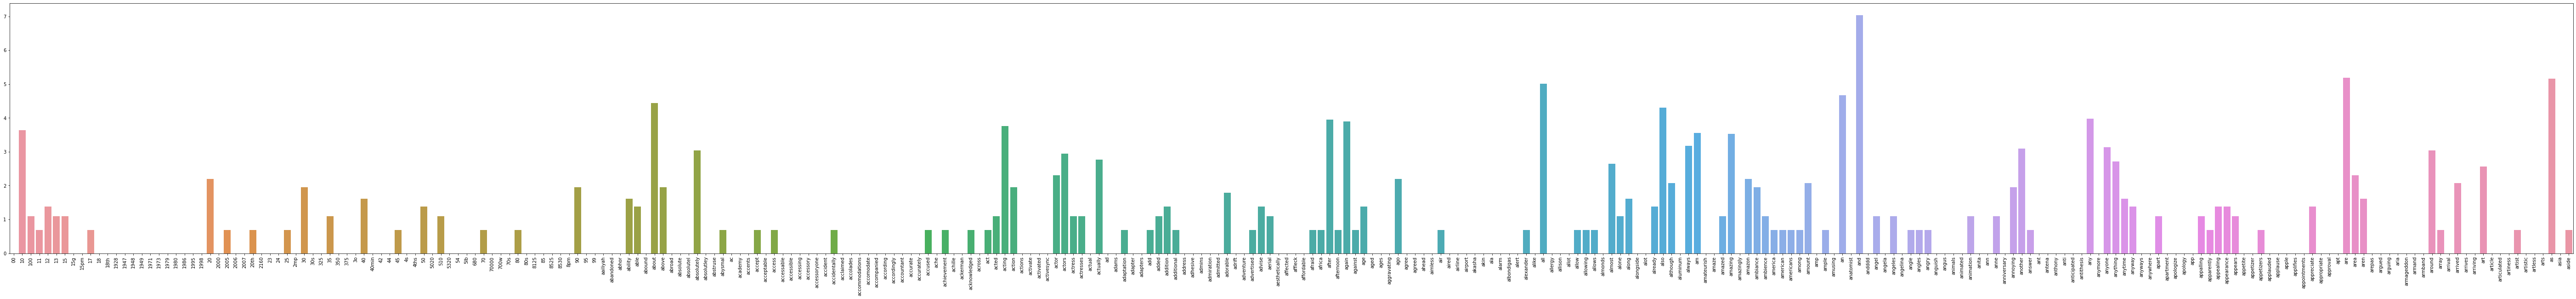

In [42]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90);

### 5.6 Discretization and Binarization
In this section we are going to discuss a very important pre-preprocessing technique used to transform the data, specifically categorical values, into a format that satisfies certain criteria required by particular algorithms. Given our current original dataset, we would like to transform one of the attributes, `category_name`, into four binary attributes. In other words, we are taking the category name and replacing it with a `n` asymmetric binary attributes. The logic behind this transformation is discussed in detail in the recommended Data Mining text book (please refer to it on page 58). People from the machine learning community also refer to this transformation as one-hot encoding, but as you may become aware later in the course, these concepts are all the same, we just have different prefrence on how we refer to the concepts. Let us take a look at what we want to achieve in code. 

In [43]:
#Discretization and Binarization
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()
mlb.fit(datasets.category)
datasets['bin_category'] = mlb.transform(datasets['category']).tolist()
print(datasets[0:9])

                                            sentence  category category_name  \
0  So there is no way for me to plug it in here i...         0  amazon_cells   
1                        Good case, Excellent value.         0  amazon_cells   
2                             Great for the jawbone.         0  amazon_cells   
3  Tied to charger for conversations lasting more...         0  amazon_cells   
4                                  The mic is great.         0  amazon_cells   
5  I have to jiggle the plug to get it to line up...         0  amazon_cells   
6  If you have several dozen or several hundred c...         0  amazon_cells   
7        If you are Razr owner...you must have this!         0  amazon_cells   
8                Needless to say, I wasted my money.         0  amazon_cells   

  score                                           unigrams bin_category  
0     0  [So, there, is, no, way, for, me, to, plug, it...    [1, 0, 0]  
1     1               [Good, case, ,, Excellent, va

In [44]:
#Exercise 16
# Try to generate the binarization using the category_name column instead. Does it work?
mlb.fit(datasets.category_name)
datasets['bin_category'] = mlb.transform(datasets['category_name']).tolist()
print(datasets[0:9])

                                            sentence  category category_name  \
0  So there is no way for me to plug it in here i...         0  amazon_cells   
1                        Good case, Excellent value.         0  amazon_cells   
2                             Great for the jawbone.         0  amazon_cells   
3  Tied to charger for conversations lasting more...         0  amazon_cells   
4                                  The mic is great.         0  amazon_cells   
5  I have to jiggle the plug to get it to line up...         0  amazon_cells   
6  If you have several dozen or several hundred c...         0  amazon_cells   
7        If you are Razr owner...you must have this!         0  amazon_cells   
8                Needless to say, I wasted my money.         0  amazon_cells   

  score                                           unigrams bin_category  
0     0  [So, there, is, no, way, for, me, to, plug, it...    [1, 0, 0]  
1     1               [Good, case, ,, Excellent, va

### Third

### Fourth
Q: What are those inefficent parts you noticed? 
A: heatmap is inefficient due to our data is sparse martrix

Q: How can you improve the Data preprocessing for these specific datasets?
A: I think delete null data and duplicate data can improve it